<a href="https://colab.research.google.com/github/GunelXelilli/Global-Terrorism-Data-Analysis/blob/main/GTD_Analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv('/content/globalterrorismdb_0718dist.csv',encoding='latin1')
df.head()

/tmp/ipython-input-4000366263.py:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/globalterrorismdb_0718dist.csv',encoding='latin1')


eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [3]:
df.shape

(181691, 135)

In [4]:
df.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [5]:
df.select_dtypes(include='object').columns

Index(['approxdate', 'resolution', 'country_txt', 'region_txt', 'provstate',
       'city', 'location', 'summary', 'alternative_txt', 'attacktype1_txt',
       'attacktype2_txt', 'attacktype3_txt', 'targtype1_txt',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1_txt', 'targtype2_txt',
       'targsubtype2_txt', 'corp2', 'target2', 'natlty2_txt', 'targtype3_txt',
       'targsubtype3_txt', 'corp3', 'target3', 'natlty3_txt', 'gname',
       'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive',
       'claimmode_txt', 'claimmode2_txt', 'claimmode3_txt', 'weaptype1_txt',
       'weapsubtype1_txt', 'weaptype2_txt', 'weapsubtype2_txt',
       'weaptype3_txt', 'weapsubtype3_txt', 'weaptype4_txt',
       'weapsubtype4_txt', 'weapdetail', 'propextent_txt', 'propcomment',
       'divert', 'kidhijcountry', 'ransomnote', 'hostkidoutcome_txt',
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'related'],
      dtype='object')

In [6]:
df.select_dtypes(include=['int64']).columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country', 'region',
       'vicinity', 'crit1', 'crit2', 'crit3', 'success', 'suicide',
       'attacktype1', 'targtype1', 'individual', 'weaptype1', 'property',
       'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [7]:
df.select_dtypes(include=['float64']).columns

Index(['latitude', 'longitude', 'specificity', 'doubtterr', 'alternative',
       'multiple', 'attacktype2', 'attacktype3', 'targsubtype1', 'natlty1',
       'targtype2', 'targsubtype2', 'natlty2', 'targtype3', 'targsubtype3',
       'natlty3', 'guncertain1', 'guncertain2', 'guncertain3', 'nperps',
       'nperpcap', 'claimed', 'claimmode', 'claim2', 'claimmode2', 'claim3',
       'claimmode3', 'compclaim', 'weapsubtype1', 'weaptype2', 'weapsubtype2',
       'weaptype3', 'weapsubtype3', 'weaptype4', 'weapsubtype4', 'nkill',
       'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'propextent',
       'propvalue', 'ishostkid', 'nhostkid', 'nhostkidus', 'nhours', 'ndays',
       'ransom', 'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus',
       'hostkidoutcome', 'nreleased'],
      dtype='object')

DATA CLEANING

In [9]:
df.apply(lambda x: x.map(type).nunique())

eventid       1
iyear         1
imonth        1
iday          1
approxdate    2
             ..
INT_LOG       1
INT_IDEO      1
INT_MISC      1
INT_ANY       1
related       2
Length: 135, dtype: int64

In [12]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 200)
df.isnull().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     435
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targtype1                  0
targtype1_txt              0
targsubtype1           10373
targsubtype1_txt       10373
corp1                  42552
target1                  638
natlty1                 1559
natlty1_txt             1559
targtype2             170547
targtype2_txt         170547
targsubtype2          171006
targsubtype2_txt      171006
corp2                 171574
target2               170671
natlty2               170863
natlty2_txt           170863
targtype3             180515
targtype3_txt         180515
targsubtype3          180594
targsubtype3_txt      180594
corp3                 180665
target3               180516
natlty3               180544
natlty3_txt           180544
gname                      0
gsubname              175801
gname2                179678
gsubname2             181531
gname3                181367
gsubname3             181671
motive                131130
guncertain1              380
guncertain2           179736
guncertain3           181371
individual                 0
nperps                     0
nperpcap               69489
claimed                66120
claimmode             162608
claimmode_txt         162608
claim2                179801
claimmode2            181075
claimmode2_txt        181075
claim3                181373
claimmode3            181558
claimmode3_txt        181558
compclaim             176852
weaptype1                  0
weaptype1_txt              0
weapsubtype1           20768
weapsubtype1_txt       20768
weaptype2             168564
weaptype2_txt         168564
weapsubtype2          170149
weapsubtype2_txt      170149
weaptype3             179828
weaptype3_txt         179828
weapsubtype3          179998
weapsubtype3_txt      179998
weaptype4             181618
weaptype4_txt         181618
weapsubtype4          181621
weapsubtype4_txt      181621
weapdetail             67670
nkill                      0
nkillus                64446
nkillter                   0
nwound                     0
nwoundus               64702
nwoundte                   0
property                   0
propextent            117626
propextent_txt        117626
propvalue             142702
propcomment           123732
ishostkid                178
nhostkid              168119
nhostkidus            168174
nhours                177628
ndays                 173567
divert                181367
kidhijcountry         178386
ransom                104310
ransomamt             180341
ransomamtus           181128
ransompaid            180917
ransompaidus          181139
ransomnote            181179
hostkidoutcome        170700
hostkidoutcome_txt    170700
nreleased             171291
addnotes              153402
scite1                 66191
scite2                104758
scite3                138175
dbsource                   0
INT_LOG                    0
INT_IDEO                   0
INT_MISC                   0
INT_ANY                    0
related               156653
dtype: int64

In [10]:
cols_to_int = ['nkill', 'nwound', 'nkillter', 'nperps', 'nwoundte']

df[cols_to_int] = df[cols_to_int].fillna(0).astype(int)


In [13]:
# Removed columns 'approxdate' and 'related' due to containing non-essential information, streamlining the dataset for analysis.
df.drop(['approxdate','related'],axis=1,inplace=True)

In [14]:
# Removed columns 'INT_LOG', 'INT_IDEO', 'INT_MISC'
df.drop(['INT_LOG','INT_IDEO','INT_MISC'],axis=1,inplace=True)

In [15]:
df.drop(['claim2','claimmode2','claim3','claimmode3','compclaim'],axis=1,inplace=True)

In [16]:
df.drop(['weaptype2','weapsubtype2','weaptype3','weapsubtype3','weaptype4','weapsubtype4'],axis=1,inplace=True)

In [17]:
df.drop(['attacktype2', 'attacktype3','targtype2', 'targsubtype2','targtype3', 'targsubtype3','natlty2','natlty3', 'guncertain2', 'guncertain3'],axis=1,inplace=True)

MISSING VALUES

In [19]:
import pandas as pd
import numpy as np


columns_to_keep = [
    'iyear', 'imonth', 'iday',
    'latitude', 'longitude',
    'country_txt', 'region',
    'success', 'suicide',
    'attacktype1', 'targtype1', 'targsubtype1',
    'weaptype1', 'weapsubtype1',
    'nkill', 'nwound', 'nperps', 'nperpcap',
    'INT_ANY'
]

df_clean = df[columns_to_keep].copy()



df_clean = df[columns_to_keep].copy()



numeric_median_cols = ['nkill', 'nwound', 'nperps', 'nperpcap']
for col in numeric_median_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())


binary_cols = ['success', 'suicide', 'INT_ANY']
for col in binary_cols:
    df_clean[col] = df_clean[col].fillna(0)


categorical_cols = ['attacktype1', 'targtype1', 'targsubtype1',
                    'weaptype1', 'weapsubtype1', 'country_txt', 'region']
for col in categorical_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])


date_cols = ['imonth', 'iday']
for col in date_cols:
    df_clean[col] = df_clean[col].fillna(1)

print(df_clean.isnull().sum())


iyear              0
imonth             0
iday               0
latitude        4556
longitude       4557
country_txt        0
region             0
success            0
suicide            0
attacktype1        0
targtype1          0
targsubtype1       0
weaptype1          0
weapsubtype1       0
nkill              0
nwound             0
nperps             0
nperpcap           0
INT_ANY            0
dtype: int64


In [ ]:
df_clean['nkill'].astype(int)

ANALYZING

In [21]:
# Numeric columns
df_clean.describe()

iyear         imonth           iday       latitude     longitude         region        success        suicide    attacktype1      targtype1   targsubtype1      weaptype1  \
count  181691.000000  181691.000000  181691.000000  177135.000000  1.771340e+05  181691.000000  181691.000000  181691.000000  181691.000000  181691.000000  181691.000000  181691.000000   
mean     2002.638997       6.467277      15.505644      23.498343 -4.586957e+02       7.160938       0.889598       0.036507       3.247547       8.439719      48.114931       6.447325   
std        13.259430       3.388303       8.814045      18.569242  2.047790e+05       2.933408       0.313391       0.187549       1.915772       6.653838      30.413887       2.173435   
min      1970.000000       0.000000       0.000000     -53.154613 -8.618590e+07       1.000000       0.000000       0.000000       1.000000       1.000000       1.000000       1.000000   
25%      1991.000000       4.000000       8.000000      11.510046  4.545640e+00       5.000000       1.000000       0.000000       2.000000       3.000000      23.000000       5.000000   
50%      2009.000000       6.000000      15.000000      31.467463  4.324651e+01       6.000000       1.000000       0.000000       3.000000       4.000000      39.000000       6.000000   
75%      2014.000000       9.000000      23.000000      34.685087  6.871033e+01      10.000000       1.000000       0.000000       3.000000      14.000000      73.000000       6.000000   
max      2017.000000      12.000000      31.000000      74.633553  1.793667e+02      12.000000       1.000000       1.000000       9.000000      22.000000     113.000000      13.000000   

        weapsubtype1          nkill         nwound         nperps       nperpcap        INT_ANY  
count  181691.000000  181691.000000  181691.000000  181691.000000  181691.000000  181691.000000  
mean       11.675289       2.266860       2.883291     -39.778387      -0.937262      -3.945952  
std         6.307446      11.227057      34.309746     171.910898      10.109514       4.691325  
min         1.000000       0.000000       0.000000     -99.000000     -99.000000      -9.000000  
25%         5.000000       0.000000       0.000000     -99.000000       0.000000      -9.000000  
50%        15.000000       0.000000       0.000000       0.000000       0.000000       0.000000  
75%        16.000000       2.000000       2.000000       0.000000       0.000000       0.000000  
max        31.000000    1570.000000    8191.000000   25000.000000     406.000000       1.000000

In [22]:
df_clean[['success','suicide','INT_ANY']].value_counts()
#we don't need unknown so we'll replace it with '0'

success  suicide  INT_ANY
1        0        -9         71551
                   0         54058
                   1         30455
0        0        -9         10105
                   1          4528
                   0          4361
1        1         1          2056
                  -9          1792
                   0          1720
0        1         1           487
                  -9           382
                   0           196
Name: count, dtype: int64

In [ ]:
df_clean['success'].replace(-9, np.nan, inplace=True) #First We replace them with nan then with '0'
df_clean['suicide'].replace(-9, np.nan, inplace=True)
df_clean['INT_ANY'].replace(-9, np.nan, inplace=True)


In [24]:
binary_cols = ['success', 'suicide', 'INT_ANY']

for col in binary_cols:
    # NaN- 0 filled
    df_clean[col] = df_clean[col].fillna(0)
    # Float → int
    df_clean[col] = df_clean[col].astype(int)



In [25]:
df_clean[['success','suicide','INT_ANY']].value_counts() #1-successful attack,0-unsuccessful attack ,INT_ANY -international

success  suicide  INT_ANY
1        0        0          125609
                  1           30455
0        0        0           14466
                  1            4528
1        1        0            3512
                  1            2056
0        1        0             578
                  1             487
Name: count, dtype: int64

In [26]:
df_clean['attacktype1'].value_counts()

attacktype1
3    88255
2    42669
1    19312
6    11158
7    10356
9     7276
8     1015
5      991
4      659
Name: count, dtype: int64

In [27]:
df_clean['targtype1'].value_counts()

targtype1
14    43511
4     27984
3     24506
2     21283
1     20669
19     6799
21     6023
20     5898
15     4440
8      4322
7      3573
17     3039
10     2948
22     1866
6      1343
16     1009
12      970
18      440
11      351
9       317
5       263
13      137
Name: count, dtype: int64

In [28]:
df_clean['country_txt'].value_counts().head(10)

country_txt
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: count, dtype: int64

In [79]:
#Peru and Iraq
peru_iraq = df[df['country_txt'].isin(['Peru', 'Iraq'])]

#2000–2017
peru_iraq = peru_iraq[(peru_iraq['iyear'] >= 2000) & (peru_iraq['iyear'] <= 2017)]

# Count attacks per year for each country
attacks_yearly = peru_iraq.groupby(['iyear', 'country_txt']).size().reset_index(name='attack_count')
attacks_yearly

iyear country_txt  attack_count
0    2000        Iraq            10
1    2000        Peru             3
2    2001        Iraq             3
3    2001        Peru             3
4    2002        Iraq             6
5    2002        Peru             2
6    2003        Iraq           102
7    2003        Peru             1
8    2004        Iraq           323
9    2004        Peru             3
10   2005        Iraq           617
11   2005        Peru             2
12   2006        Iraq           838
13   2006        Peru             1
14   2007        Iraq          1047
15   2007        Peru             4
16   2008        Iraq          1106
17   2008        Peru             1
18   2009        Iraq          1137
19   2009        Peru             4
20   2010        Iraq          1179
21   2011        Iraq          1308
22   2012        Iraq          1437
23   2012        Peru             6
24   2013        Iraq          2852
25   2013        Peru            10
26   2014        Iraq          3933
27   2014        Peru            12
28   2015        Iraq          2751
29   2015        Peru            10
30   2016        Iraq          3360
31   2016        Peru             3
32   2017        Iraq          2466
33   2017        Peru             8

In [30]:
df_clean.groupby('country_txt')['nkill'].sum().sort_values(ascending=False).head(10).astype(int)

country_txt
Iraq           78589
Afghanistan    39384
Pakistan       23822
Nigeria        22682
India          19341
Sri Lanka      15530
Syria          15229
Colombia       14698
Peru           12771
El Salvador    12053
Name: nkill, dtype: int64

In [31]:
# Group by year and count attacks
attacks_per_year = df_clean.groupby('iyear').size().reset_index(name='attack_count')

# Sort by attack_count descending
attacks_per_year = attacks_per_year.sort_values(by='attack_count', ascending=False)

# Show top rows
print(attacks_per_year.head())



    iyear  attack_count
43   2014         16903
44   2015         14965
45   2016         13587
42   2013         12036
46   2017         10900


In [36]:
# Count number of attacks per country and region
country_region_attacks = df.groupby(['country_txt', 'region_txt']).size().reset_index(name='attack_count').head(10)

# Sort by number of attacks in descending order
country_region_attacks = country_region_attacks.sort_values(by='attack_count', ascending=False)

# Show top 10
country_region_attacks.head(10)


country_txt                   region_txt  attack_count
0          Afghanistan                   South Asia         12731
2              Algeria   Middle East & North Africa          2743
6            Argentina                South America           815
4               Angola           Sub-Saharan Africa           499
9              Austria               Western Europe           115
8            Australia        Australasia & Oceania           114
1              Albania               Eastern Europe            80
7              Armenia                 Central Asia            24
5  Antigua and Barbuda  Central America & Caribbean             1
3              Andorra               Western Europe             1

In [35]:
# Count number of attacks by attack type and weapon type
attack_weapon_counts = df.groupby(['attacktype1_txt', 'weaptype1_txt']).size().reset_index(name='count').head(10)

# Sort by number of attacks in descending order
attack_weapon_counts = attack_weapon_counts.sort_values(by='count', ascending=False)

# Show the result
attack_weapon_counts


attacktype1_txt                                      weaptype1_txt  count
2   Armed Assault                                           Firearms  36777
3   Armed Assault                                         Incendiary   2242
1   Armed Assault                                         Explosives   1982
4   Armed Assault                                              Melee   1510
7   Armed Assault                                            Unknown    144
9   Assassination                                           Chemical     16
8   Armed Assault  Vehicle (not to include vehicle-borne explosiv...      7
5   Armed Assault                                              Other      3
0   Armed Assault                                           Chemical      2
6   Armed Assault                                 Sabotage Equipment      2

In [38]:
# Count number of attacks per target type
target_attack_counts = df.groupby('targtype1_txt').size().reset_index(name='attack_count').head(10)

# Sort from most attacks to least
target_attack_counts = target_attack_counts.sort_values(by='attack_count', ascending=False)

# Show result
target_attack_counts


targtype1_txt  attack_count
9                 Military         27984
6     Government (General)         21283
2                 Business         20669
3  Educational Institution          4322
5  Government (Diplomatic)          3573
7      Journalists & Media          2948
1      Airports & Aircraft          1343
8                 Maritime           351
4     Food or Water Supply           317
0         Abortion Related           263

In [40]:
target_kills = df.groupby('targtype1_txt')[['nkill']].sum().sort_values(by='nkill', ascending=False).astype(int).head()
target_kills

nkill
targtype1_txt                      
Private Citizens & Property  140504
Military                     106047
Police                        53704
Government (General)          26071
Business                      23487

In [44]:
df['hostkidoutcome_txt'].value_counts()

hostkidoutcome_txt
Unknown                                           3606
Hostage(s) released by perpetrators               3124
Hostage(s) killed (not during rescue attempt)     2522
Combination                                       1013
Successful Rescue                                  542
Hostage(s) escaped (not during rescue attempt)     165
Attempted Rescue                                    19
Name: count, dtype: int64

In [45]:
outcome_map = {
    'Hostage(s) killed (not during rescue attempt)': 'Died',
    'Hostage(s) released by perpetrators': 'Survived',
    'Hostage(s) escaped (not during rescue attempt)': 'Survived',
    'Successful Rescue': 'Survived',
    'Attempted Rescue': 'Unknown',
    'Unknown': 'Unknown',
    'Combination': 'Unknown'
}

df['hostage_status'] = df['hostkidoutcome_txt'].map(outcome_map)
hostage_status_counts = df['hostage_status'].value_counts()

print("Hostage Outcomes:\n", hostage_status_counts)


Hostage Outcomes:
 hostage_status
Unknown     4638
Survived    3831
Died        2522
Name: count, dtype: int64


VISUALIZING

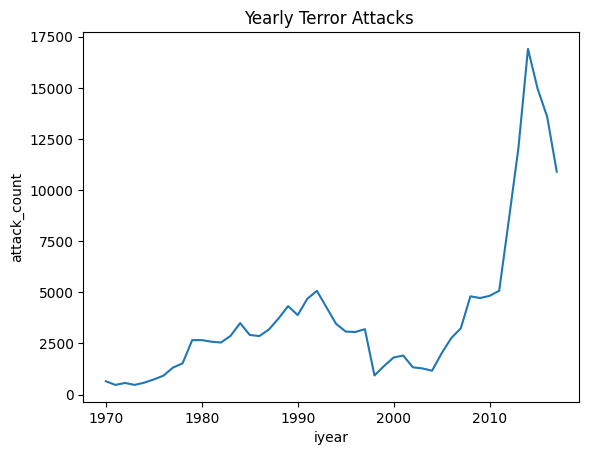

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(data=attacks_per_year, x='iyear', y='attack_count')
plt.title("Yearly Terror Attacks ")
plt.show();

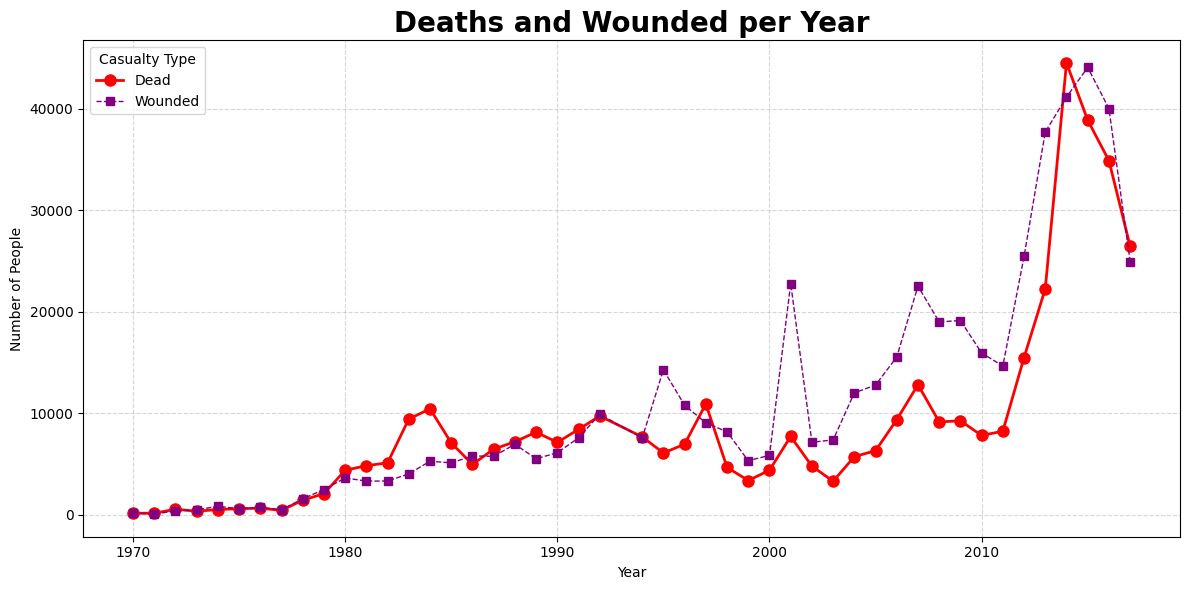

In [47]:
import pandas as pd
casualties_per_year = df.groupby('iyear')[['nkill','nwound']].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(casualties_per_year['iyear'], casualties_per_year['nkill'], label='Dead', color='red', linewidth=2, marker='o', markersize=8)
plt.plot(casualties_per_year['iyear'], casualties_per_year['nwound'], label='Wounded', color='purple', linestyle='--', linewidth=1, marker='s', markersize=6)
plt.title('Deaths and Wounded per Year', fontsize=20, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.legend(title='Casualty Type')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

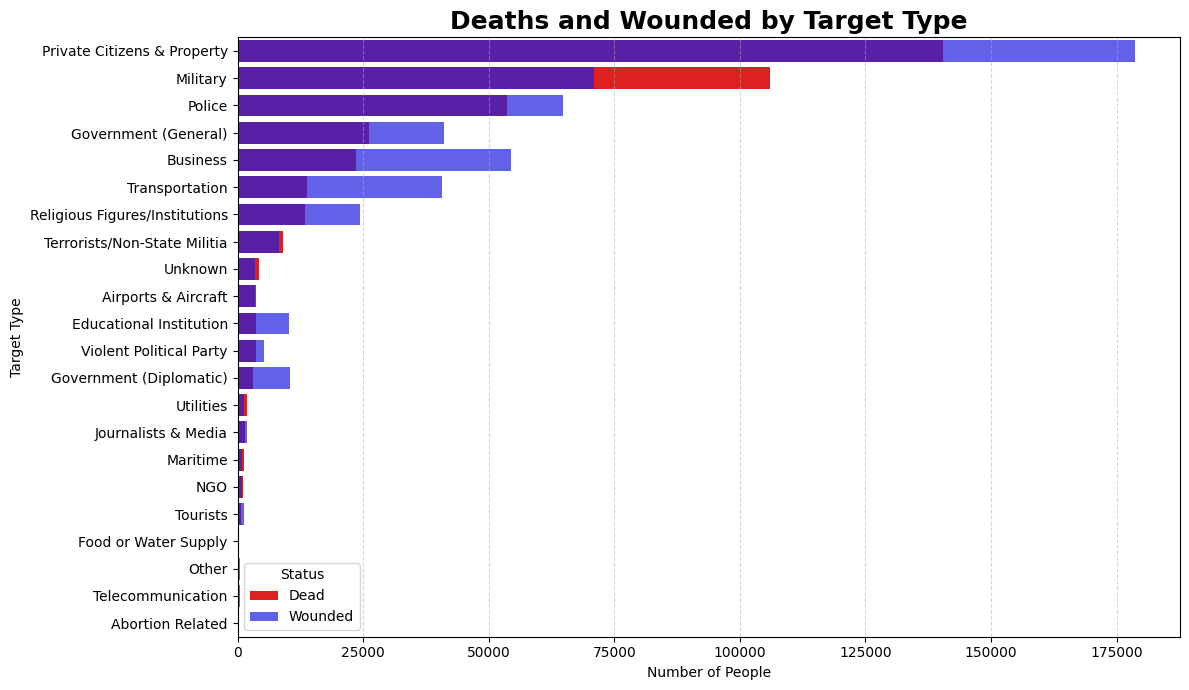

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
target_damage = df.groupby('targtype1_txt')[['nkill','nwound']].sum().reset_index()
target_damage = target_damage.sort_values(by='nkill', ascending=False)
# Plot
plt.figure(figsize=(12,7))
# Horizontal bars for deaths
sns.barplot(x='nkill', y='targtype1_txt', data=target_damage, color='red', label='Dead')
# Horizontal bars for wounded
sns.barplot(x='nwound', y='targtype1_txt', data=target_damage, color='blue', label='Wounded', alpha=0.7)
plt.xlabel('Number of People')
plt.ylabel('Target Type')
plt.title('Deaths and Wounded by Target Type', fontsize=18, fontweight='bold')
plt.legend(title='Status')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


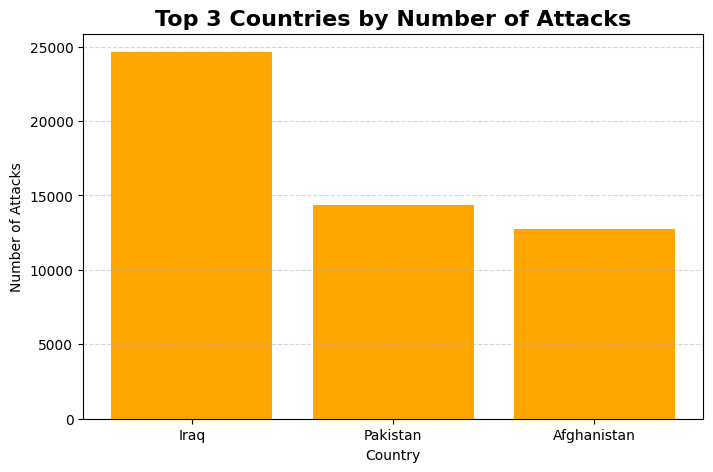

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
country_attack_counts = df.groupby('country_txt').size().reset_index(name='attack_count')
country_attack_counts = country_attack_counts.sort_values(by='attack_count', ascending=False)
top3_countries = country_attack_counts.head(3)
plt.figure(figsize=(8,5))
plt.bar(top3_countries['country_txt'], top3_countries['attack_count'], color='orange')
plt.title("Top 3 Countries by Number of Attacks", fontsize=16, fontweight='bold')
plt.xlabel("Country")
plt.ylabel("Number of Attacks")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()



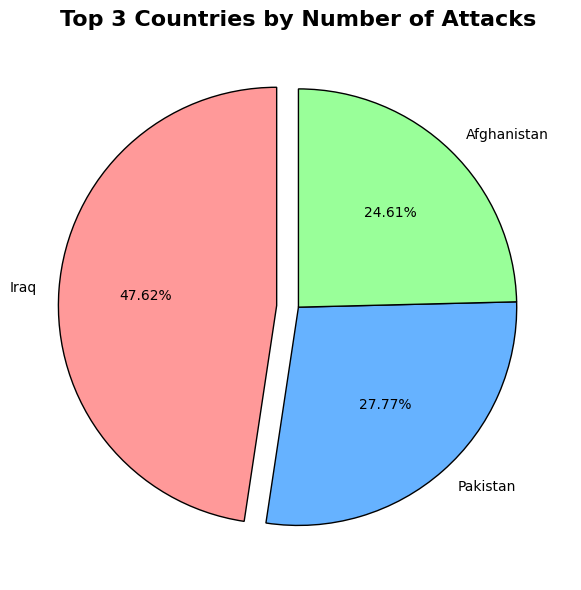

In [56]:
import matplotlib.pyplot as plt
top3_countries = country_attack_counts.head(3)
plt.figure(figsize=(6,6))
plt.pie(
    top3_countries['attack_count'],
    labels=top3_countries['country_txt'],
    autopct='%.2f%%',
    explode=[0.1,0,0],

    startangle=90,
    colors=['#FF9999','#66B2FF','#99FF99'],
    wedgeprops={'edgecolor':'black'}
)
plt.title("Top 3 Countries by Number of Attacks", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


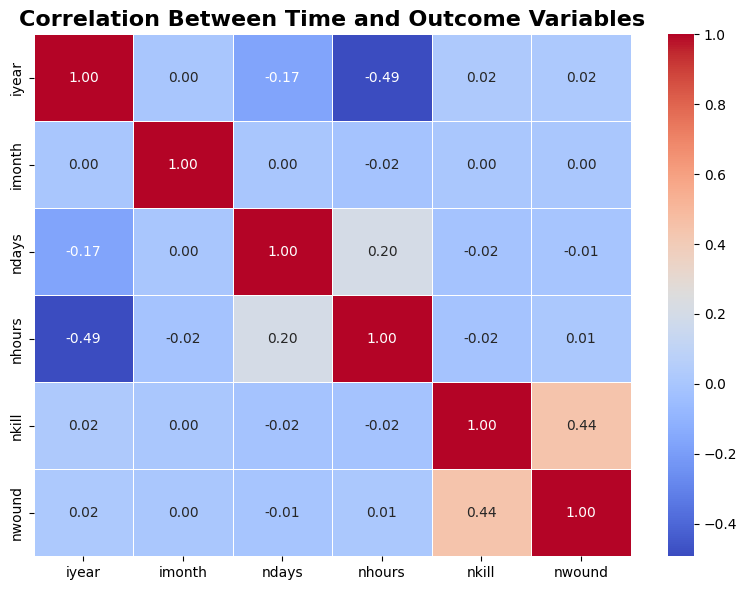

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['iyear','imonth','ndays','nhours','nkill','nwound']

corr = df[cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Time and Outcome Variables", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [58]:
import pandas as pd
country_attacks = df.groupby('country_txt').size().reset_index(name='attack_count')
country_attacks = country_attacks.sort_values(by='attack_count', ascending=False)


In [59]:
import plotly.express as px

fig = px.choropleth(
    country_attacks,
    locations="country_txt",
    locationmode="country names",
    color="attack_count",
    color_continuous_scale="Reds",
    title="Number of Terrorist Attacks by Country",
)

fig.show()


In [61]:
region_attacks = df.groupby('region_txt').size().reset_index(name='attack_count')
region_attacks = region_attacks.sort_values(by='attack_count', ascending=False)

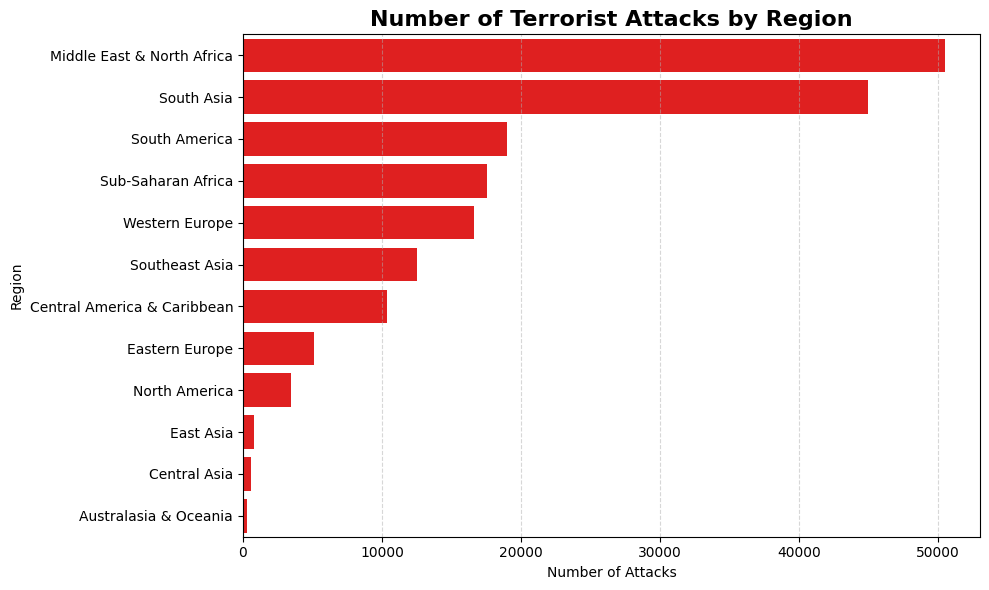

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(
    data=region_attacks,
    x='attack_count',
    y='region_txt',
    color='red'   # Single color for all bars
)
plt.xlabel('Number of Attacks')
plt.ylabel('Region')
plt.title('Number of Terrorist Attacks by Region', fontsize=16, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



In [63]:
import plotly.express as px

fig = px.scatter_geo(
    df_clean,
    lat='latitude',
    lon='longitude',
    animation_frame='iyear',
    size='nkill',
    projection='natural earth',
    title='Global Terrorism Spread Over Time'
)

fig.show()


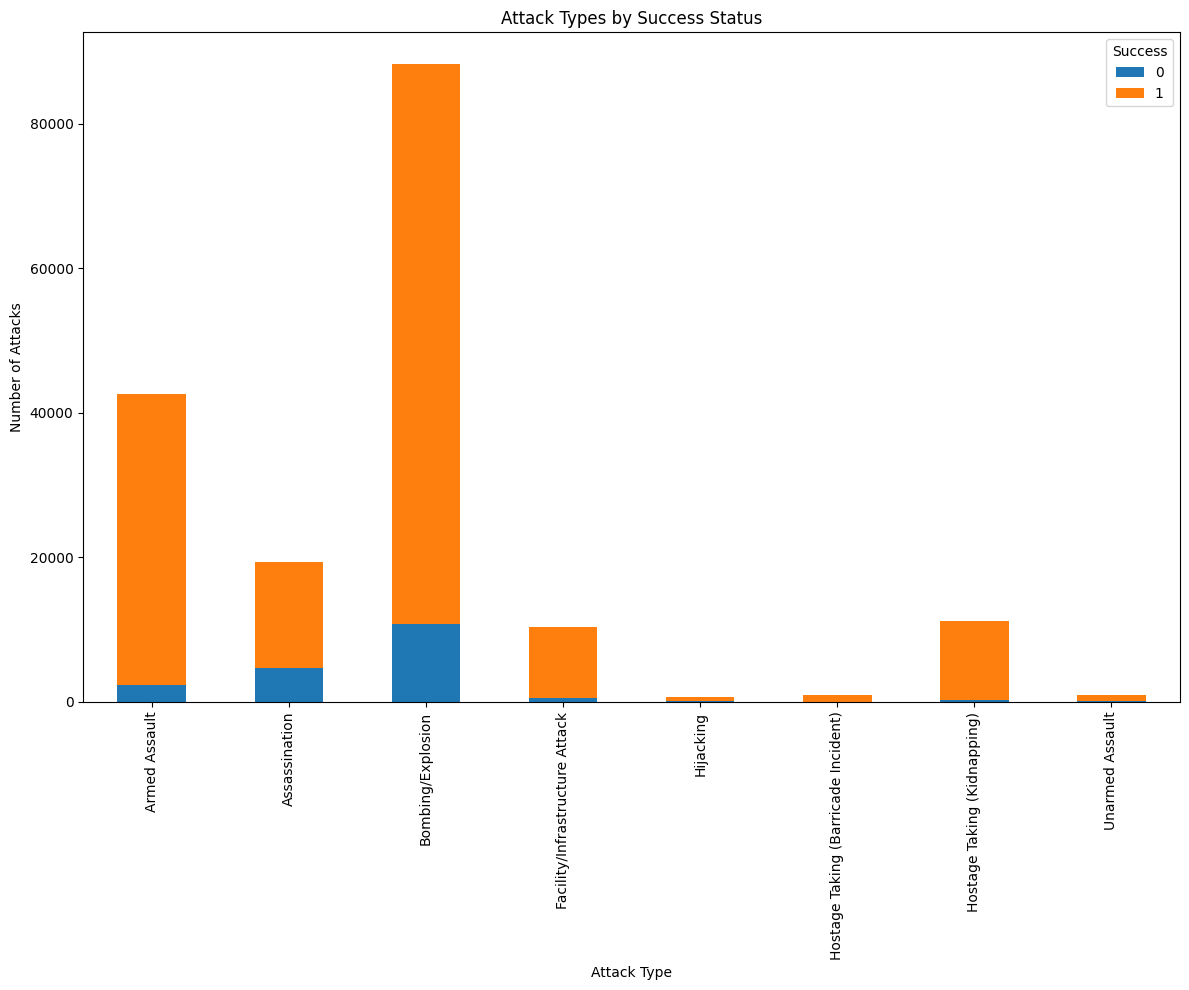

In [64]:

df_clean = df[df['attacktype1_txt'] != 'Unknown']

stacked_data = (
    df_clean
    .groupby(['attacktype1_txt', 'success'])
    .size()
    .unstack(fill_value=0)
)

stacked_data.plot(
    kind='bar',
    stacked=True,
    figsize=(12,10),

)

plt.title("Attack Types by Success Status")
plt.xlabel("Attack Type")
plt.ylabel("Number of Attacks")
plt.legend(title="Success")
plt.tight_layout()
plt.show()


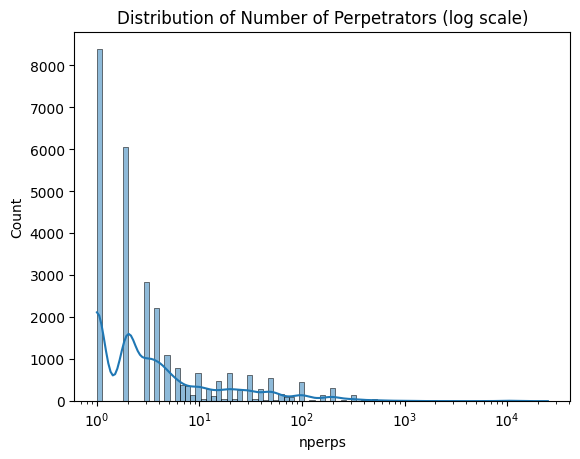

In [66]:
df_nperps = df[df['nperps'] > 0]
sns.histplot(
    df_nperps['nperps'],
    kde=True,
    log_scale=True
)
plt.title("Distribution of Number of Perpetrators (log scale)")
plt.show()

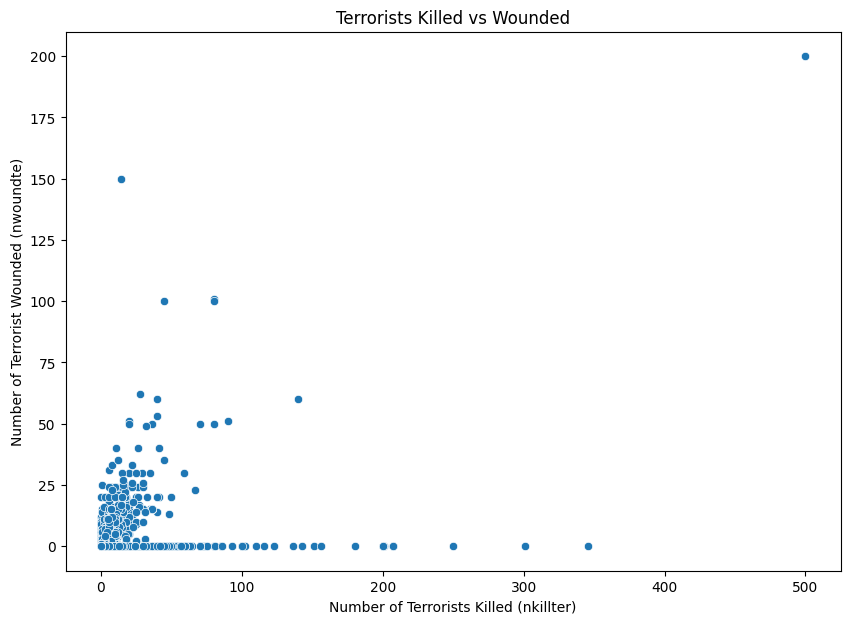

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_clean, x='nkillter', y='nwoundte')
plt.xlabel('Number of Terrorists Killed (nkillter)')
plt.ylabel('Number of Terrorist Wounded (nwoundte)')
plt.title('Terrorists Killed vs Wounded')
plt.show()



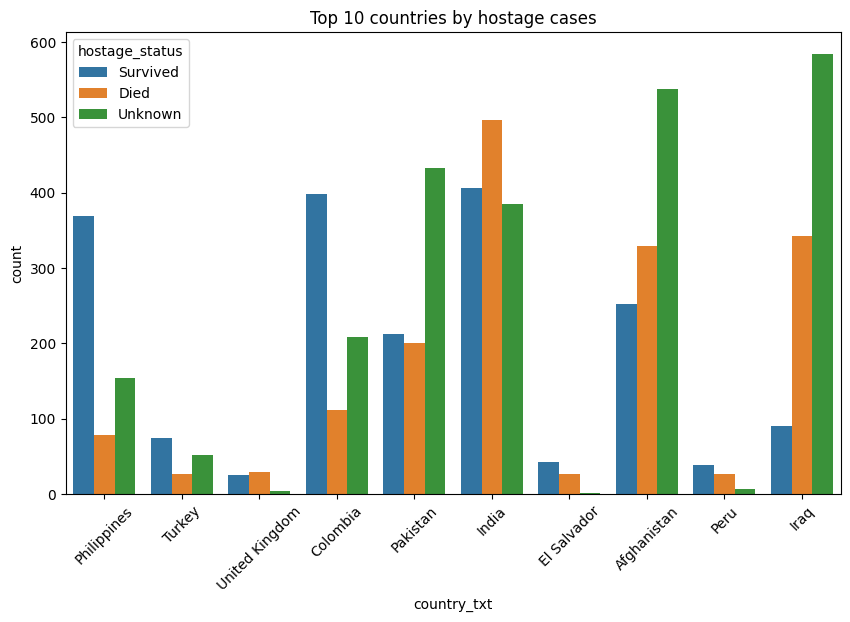

In [77]:
top_countries = df['country_txt'].value_counts().head(10).index

plt.figure(figsize=(10,6))
sns.countplot(x='country_txt', hue='hostage_status', data=df[df['country_txt'].isin(top_countries)])
plt.xticks(rotation=45)
plt.title("Top 10 countries by hostage cases")
plt.show()

